# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


578

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#base url
url = "http://api.openweathermap.org/data/2.5/weather?"

#query url
query_url = f'{url}appid={weather_api_key}&q='


city_names =[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

count = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()

        city_names.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"City #{count}: {response['name']}")
        count = count + 1

    except:
        print(f'#{count}: {city} not found.\n')
        count = count + 1



City #1: Vaini
City #2: Los Llanos de Aridane
City #3: Geraldton
City #4: Westerland
City #5: Genhe
City #6: Tasiilaq
City #7: Dhidhdhoo
City #8: Lorengau
#9: belushya guba not found.

City #10: Rikitea
City #11: Myitkyina
City #12: Hofn
City #13: Kutum
City #14: Butaritari
#15: taolanaro not found.

City #16: Jamestown
City #17: Honāvar
City #18: Maniitsoq
City #19: Severo-Kuril'sk
City #20: Chokurdakh
City #21: Busselton
City #22: Qarayeri
City #23: Bluff
City #24: Liverpool
#25: vaitupu not found.

City #26: Isangel
City #27: Ilhabela
City #28: Corat
#29: barentsburg not found.

City #30: Praia
City #31: Bredasdorp
City #32: Narsaq
City #33: Cabedelo
City #34: Grindavik
City #35: Castro
City #36: Kiunga
City #37: Puerto Ayora
City #38: Marshfield
City #39: Cape Town
City #40: Touho
City #41: Arraial do Cabo
#42: lolua not found.

City #43: Bereda
City #44: Coquimbo
City #45: Martapura
City #46: Greenville
City #47: Matata
City #48: Vila Franca do Campo
City #49: Fortuna
City #50: Ba

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    'City': city_names,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

weather_df = pd.DataFrame(weather_dict)
weather_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,297.65,84,2,6.22,TO,1631862105
1,Los Llanos de Aridane,28.6585,-17.9182,294.01,73,75,4.63,ES,1631862106
2,Geraldton,-28.7667,114.6000,292.38,39,2,6.17,AU,1631862106
3,Westerland,54.9079,8.3033,287.16,77,90,7.20,DE,1631862107
4,Genhe,50.7833,121.5167,287.45,39,16,5.12,CN,1631862107


In [5]:
def firstq(ser):
    return ser.quantile(.25)

def secondq(ser):
    return ser.quantile(.75)

summary_df = weather_df.agg(['count','mean','std','min',firstq, 'median', secondq, 'max'])[['Lat', 'Lng','Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# summary_df = summary_df.rename(index={"firstq": "25%", "median": "50%", "secondq": "75%"})

summary_df


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,5.300000e+02
min,-54.800000,-179.166700,261.990000,12.000000,0.000000,0.000000,1.631861e+09
max,78.218600,178.416700,311.140000,100.000000,100.000000,14.580000,1.631862e+09
mean,19.899752,12.982445,291.932849,70.824528,57.709434,3.526396,1.631862e+09
std,33.051426,89.368163,9.079740,21.180951,40.604116,2.362141,9.809056e+01
firstq,-6.828375,-64.678525,285.000000,62.000000,14.250000,1.715000,1.631862e+09
median,21.759950,17.915350,294.270000,75.000000,75.000000,3.035000,1.631862e+09
secondq,49.157325,94.412475,298.950000,86.000000,100.000000,4.950000,1.631862e+09


In [6]:
weather_df.to_csv('weatherdata.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
len(weather_df)

530

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_series = weather_df[weather_df['Humidity'] > 100].index
index_series

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
weather_df = weather_df.drop(index_series)
len(weather_df)

530

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

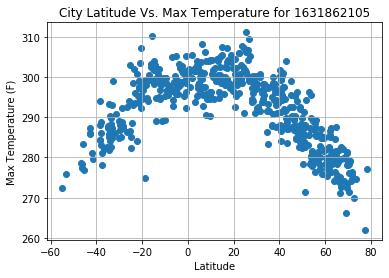

In [25]:
x = weather_df['Lat']

y = weather_df['Max Temp']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude Vs. Max Temperature for {date}")

plt.savefig('Latitude_vs_Temperature_Plot.png')
plt.show()


## Latitude vs. Humidity Plot

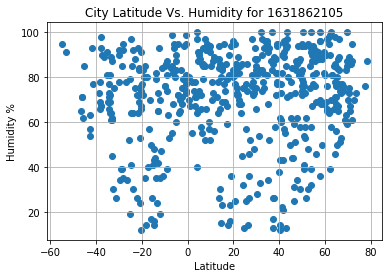

In [24]:
x = weather_df['Lat']

y = weather_df['Humidity']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude Vs. Humidity for {date}")

plt.savefig('Latitude_vs_Humidity_Plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

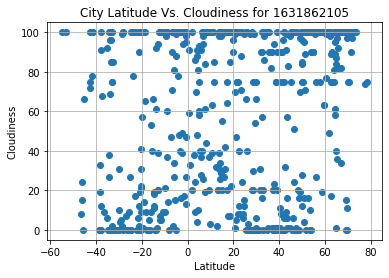

In [27]:
x = weather_df['Lat']

y = weather_df['Cloudiness']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude Vs. Cloudiness for {date}")

plt.savefig('Latitude_vs_Cloudiness_Plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

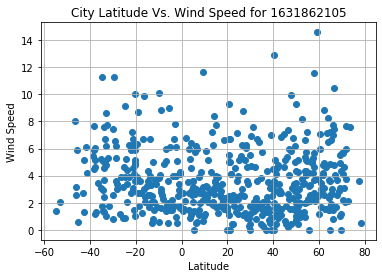

In [28]:
x = weather_df['Lat']

y = weather_df['Wind Speed']

date = weather_df['Date'][0]


plt.scatter(x,y)

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title(f"City Latitude Vs. Wind Speed for {date}")

plt.savefig('Latitude_vs_WindSpeed_Plot.png')
plt.show()

## Linear Regression

In [14]:
# northern hemisphere latitudes are positive
north_df = weather_df[weather_df['Lat'] >= 0]

south_df = weather_df[weather_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.852028424094066


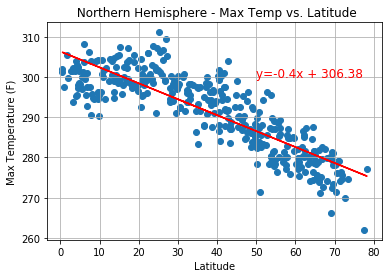

In [33]:
x = north_df['Lat']
y = north_df['Max Temp']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Northern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(50,300),fontsize=12,color="red")

plt.savefig('NorthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7681662287359017


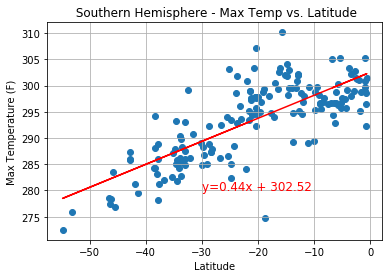

In [35]:
x = south_df['Lat']
y = south_df['Max Temp']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f" Southern Hemisphere - Max Temp vs. Latitude")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,280),fontsize=12,color="red")

plt.savefig('SouthHemisphere_MaxTemp_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.036390360787276387


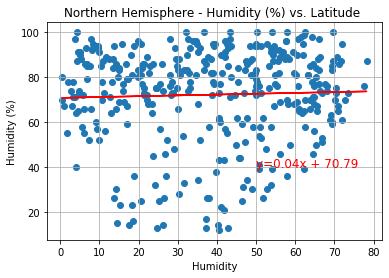

In [36]:
x = north_df['Lat']
y = north_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Humidity")
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(50,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005542771855770968


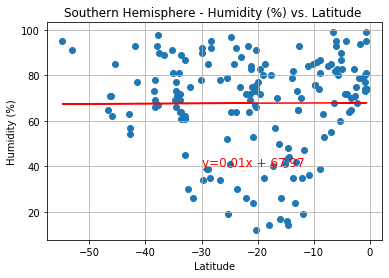

In [37]:
x = south_df['Lat']
y = south_df['Humidity']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Humidity_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19916213456400347


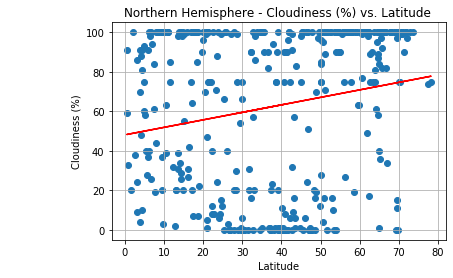

In [38]:
x = north_df['Lat']
y = north_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('NorthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10141427706085372


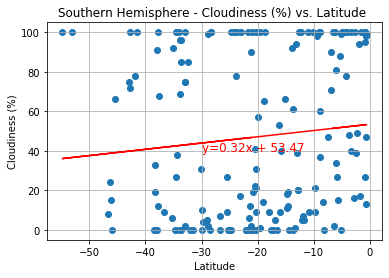

In [39]:
x = south_df['Lat']
y = south_df['Cloudiness']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(-30,40),fontsize=12,color="red")

plt.savefig('SouthHemisphere_Cloudiness_vs_Latitude_LinRegression.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1225851298862804


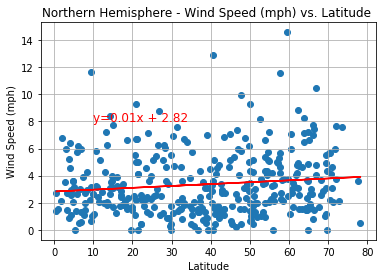

In [40]:
x = north_df['Lat']
y = north_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('NorthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1652987045207554


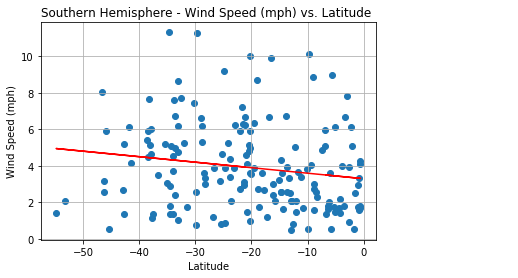

In [41]:
x = south_df['Lat']
y = south_df['Wind Speed']


plt.scatter(x, y)

slope, intercept, r, p, se = linregress(x, y)

y_linear = slope*x +intercept
plt.plot(x,y_linear, color='red')

print(f'The r-value is: {r}')

# format
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude ")
plt.annotate(f'y={slope.round(2)}x + {intercept.round(2)}',(10,8),fontsize=12,color="red")

plt.savefig('SouthHemisphere_WindSpeed_vs_Latitude_LinRegression.png')
plt.show()